# RS (Relative Strength)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime,timedelta
import FinanceDataReader as fdr
import openpyxl

In [2]:
start = '2025-11-01'
end = '2026-02-01'

In [14]:
# KOSPI Close Price Weekly Return
kospi = fdr.DataReader('KS11')['Close'][:-1]

kospi_prices = kospi.loc[start:end]

weekly_return1 = kospi_prices.pct_change(periods=5)[5:] * 100 

# 개별 기업 확인

In [16]:
def RS_week(ticker):
        try:
                asset_prices = fdr.DataReader(ticker,start,end)['Close'][:-1]
                
                weekly_return2 = asset_prices.pct_change(periods=5)[5:] * 100

                RS = weekly_return2 - weekly_return1
                
                return RS
        except:
                asset_prices = fdr.DataReader(f'YAHOO:{ticker}.KS',start,end)['Close'][:-1]

                weekly_return2 = asset_prices.pct_change(periods=5)[5:] * 100

                RS = weekly_return2 - weekly_return1
                
                return RS

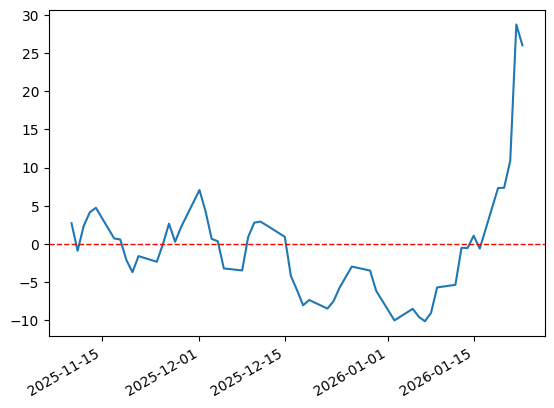

In [ ]:
RS = RS_week('0005D0')

RS.plot()

plt.axhline(0, color='red', linestyle='--', linewidth=1);

# 전체 ETF RS 확인

In [5]:
df_etfs = fdr.StockListing('ETF/KR')

In [17]:
no_data= []
dic_code = {}

for i,j in zip(df_etfs['Symbol'],df_etfs['Name']):
    try:
        prices = RS_week(i)
        if not prices.empty and prices.iloc[-1]>=0:
            dic_code[i] = j 
    except:
        no_data.append(i)
    

In [7]:
for idx,s in enumerate(no_data):
    print(idx,s)

In [18]:
today_str = (datetime.now() - timedelta(days=2)).strftime('%Y-%m-%d')

df_rs_etfs= pd.DataFrame(list(dic_code.items()), columns=['Ticker', 'Name'])

df_rs_etfs.to_excel(f"{today_str}_etf_list.xlsx", index=False)

print("엑셀 파일 저장 완료!")

엑셀 파일 저장 완료!



코드(숫자),분류 명칭,설명 </br>
1,시장지수,"KOSPI 200, KOSDAQ 150 등 시장 대표 지수 추종" </br>
2,업종/섹터,"IT, 헬스케어, 금융, 에너지 등 특정 산업군 투자"</br>
3,채권,"국고채, 회사채, 단기자금(KOFR) 등 채권형"</br>
4,기타,"원자재(금, 구리), 통화(달러), 부동산 등"</br>
5,파생상품,"레버리지, 인버스 등 파생형 구조"</br>
6,해외지수,"S&P500, 나스닥100, 항셍 등 해외 시장 지수 추종"</br>
7,전략/배당,"고배당, 저변동성(로우볼), 가치주 등 특정 전략(Factor)"</br>
